<a href="https://colab.research.google.com/github/katsuki-nagakubo/Tweets_Word2vec/blob/final/trump_tweets_s%26p500_relation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#データの取得と成形

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#https://teratail.com/questions/128725

from ast import literal_eval
from pprint import pprint

f = open('/content/trump_tweets.txt', 'r')
text = f.read()
mylist = literal_eval(text)

print(type(mylist), type(mylist[0]))

<class 'list'> <class 'dict'>


In [3]:
df_text=[]
df_created_at=[]
df_id_str=[]

print(len(mylist),"tweets")

for i in range(len(mylist)):
    text = mylist[i]["text"]
    created_at = mylist[i]["created_at"]
    id_str = mylist[i]["id_str"]
    df_text.append(text)
    df_created_at.append(created_at)
    df_id_str.append(id_str)

tweet_list=[df_created_at,df_id_str,df_text]
#print(tweet_list)

17544 tweets


In [0]:
#https://ai-inter1.com/pandas-dataframe_basic/
#リスト型にしたデータをPandasでDataFrameにした

columns1=["created_at"]
tweet_data = pd.DataFrame( data = df_created_at, columns = columns1)
tweet_data["id"]=df_id_str
tweet_data["text"] = df_text

In [0]:
#https://teratail.com/questions/132333
#https://note.nkmk.me/python-pandas-datetime-timestamp/

tweet_data["time_created_at"] = pd.to_datetime(tweet_data['created_at'])
tweet_data["date_created_at"] = tweet_data["time_created_at"].dt.date
tweet_data["key"]=pd.to_datetime(tweet_data["date_created_at"])

In [0]:
# https://www.macrotrends.net/2488/sp500-10-year-daily-chart

sp_data = pd.read_csv('/content/sp500-10-year-daily-chart.csv')
sp_data["date_64"] = pd.to_datetime(sp_data["date"])
sp_data["key"] =sp_data["date_64"] 

In [7]:
#内部結合
#http://pppurple.hatenablog.com/entry/2016/06/27/022310#inner-join
#https://note.nkmk.me/python-pandas-merge-join/

tweet_data=pd.merge(tweet_data, sp_data)
tweet_data.columns
data = tweet_data[["key"," value","text"]]

#行の名前を変更する　20200505
data = data.rename(columns={"key": "date"," value":"price"})
data.head()

,date,price,text
0,2020-05-01,2830.71,RT @StevenTDennis: Trump gets bump in latest G...
1,2020-05-01,2830.71,"The Governor of Michigan should give a little,..."
2,2020-05-01,2830.71,"Cryin Chuck Schumer, compared to what other Se..."
3,2020-05-01,2830.71,Cryin’ Chuck Schumer was on a late night show ...
4,2020-05-01,2830.71,RT @TeamTrump: President @realDonaldTrump: “We...


In [8]:
# trumpが大統領になった2017年1月20日から、GW前2020年5月1日までのデータを分析する
# https://qiita.com/mSpring/items/6ec1ab28dcb261db2c73

import datetime as dt
data2 = data[(data['date'] >= dt.datetime(2017,1,20)) & (data['date'] <= dt.datetime(2020,5,1))]
print( "2017/01/20 - 2020/05/01のツイート数は", len(data2))

2017/01/20 - 2020/05/01のツイート数は 12259


In [0]:
#新しいデータを追加すると上書き保存されるようにmode="a"にした。

#初回だけ,headerはTrue
data2.to_csv("s&p_tweets.csv", index=False, mode='a', header=True)
#2回目以降はFalse
#data2.to_csv("s&p_tweets.csv", index=False, mode='a', header=False)

In [10]:
# Fileを読み込むことで最新のデータで分析できる

data = pd.read_csv("s&p_tweets.csv")
print( len(data),"tweets")

12259 tweets


In [11]:
#形態素解析
#https://yottagin.com/?p=4360

import nltk
nltk.download('stopwords')

tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
for tweet in data["text"][:1]:
    print (tweet_tokenizer.tokenize(tweet))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['rt', ':', 'trump', 'gets', 'bump', 'in', 'latest', 'gallup', 'poll', ':', '49', '%', 'approval', '(', '+', '6', ',', 'tied', 'for', 'his', 'best', ')', '47', '%', 'disapproval', '(', '-', '7', ')']


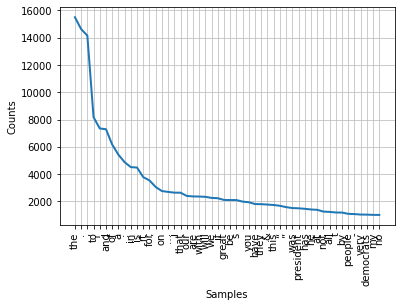

In [12]:
words = []
for tweet in data["text"]:
    words += tweet_tokenizer.tokenize(tweet)

fdist = nltk.FreqDist(words)
fdist.plot(50)

In [13]:
#高頻度のツイートを表示
df_fdist = pd.DataFrame(fdist.most_common(10), columns=['Word', 'Frequency'])
df_fdist

,Word,Frequency
0,the,15504
1,.,14634
2,",",14156
3,to,8172
4,!,7343
5,and,7289
6,of,6165
7,a,5419
8,:,4870
9,in,4507


In [0]:
#tokenにする
import re
import string

stemmer = nltk.stem.PorterStemmer()
punctuations = string.punctuation
all_tweets_clean = []

#Tweet毎にリスト形式で保存するための加工
result=[]

for tweet in data["text"]:
    # RTから始まる部分を取り除く。
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # リンクを取り除く。
    tweet = re.sub(r'(http|https):\/\/.*[\r\n]*', '', tweet)
    # ハッシュタグを取り除く。
    tweet = re.sub(r'#', '', tweet)
    # 句読点の削除
    tweet = tweet.translate(str.maketrans('', '', string.punctuation)) 
    # 単語に分解する。
    tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    result.append(tweet_tokens)

In [0]:
stopwords = nltk.corpus.stopwords.words('english')
stop_words = ["→", "←", "?", "」", "「","(",")","!",".",",","&","…","%",":",";","“"]
stopwords += stop_words

#print(stopwords)

result_2=[]
result_3=[]
for i in range(len(result)):
    for word in result[i]:
        if word not in stopwords:
            result_2.append(word)
    result_3.append(result_2)
    result_2=[]

In [0]:
#Word2Vec

from gensim.models import word2vec

In [17]:
# 対象データをLinseSentence(one sentence = one lineとして扱う)で読み込む

sentences = result_3
sentences[0]

['steventdennis',
 'trump',
 'gets',
 'bump',
 'latest',
 'gallup',
 'poll',
 '49',
 'approval',
 '6',
 'tied',
 'best',
 '47',
 'disapproval',
 '7']

In [0]:
# skip-gramモデルの学習
skipgram_model = word2vec.Word2Vec(sentences,
                                   sg=1,
                                   size=300,
                                   min_count=10,
                                   window=15, seed=1234)

In [19]:
# 作成したモデルの保存
skipgram_model.save("skipgram_w2v.model")
# saveしたモデルを読み込む時は
#skipgram_model = word2vec.Word2Vec.load("skipgram_w2v.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [20]:
# coronavirusと似たキーワードを見つけていきます。
# ここで記載しているscoreは、単語同士のコサイン類似度です。
pd.DataFrame(skipgram_model.wv.most_similar(
    positive=["coronavirus"]), columns=["keyword", "score"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,keyword,score
0,covid,0.838701
1,response,0.836250
2,task,0.823789
3,spread,0.818272
4,outbreak,0.802567
5,19,0.793259
6,briefing,0.768820
7,executive,0.767917
8,providing,0.765017
9,force,0.762355


In [0]:
"""
1. 抽出された各単語を、作成したword2Vecによってベクトル化
2. 変換された各単語ベクトルの平均をとり、その結果得られたベクトルを記事のベクトルとする
上記2ステップを実行する関数を作成
"""

num_features = 300


def avg_document_vector(data, num_features):
    document_vec = np.zeros((len(data), num_features))
    for i, doc_word_list in enumerate(data):
        feature_vec = np.zeros((num_features,), dtype="float32")
        for word in doc_word_list:
            try:
                feature_vec = np.add(
                    feature_vec, skipgram_model.wv.__getitem__(word))
            except:
                pass

        feature_vec = np.divide(feature_vec, len(doc_word_list))
        document_vec[i] = feature_vec
    return document_vec

In [22]:
X = avg_document_vector(data=sentences, num_features=300)
X.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


(12259, 300)

In [23]:
# outer join
data2 = pd.DataFrame(X)
df_tweets_word2vec =  pd.concat([data, data2], axis=1)
df_tweets_word2vec.head()

,date,price,text,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,2020-05-01,2830.71,RT @StevenTDennis: Trump gets bump in latest G...,-0.001855,-0.012664,0.006259,-0.037889,0.015356,0.011330,0.054757,0.136159,0.021117,-0.028413,-0.062699,0.110947,-0.061708,-0.032517,-0.072860,-0.073859,-0.023836,0.109070,0.079070,-0.021593,-0.060306,-0.019323,0.035336,0.004693,0.072716,0.049219,-0.006881,-0.078244,-0.071053,-0.021288,0.016575,0.008747,-0.068069,-0.005744,0.068391,-0.021733,-0.017072,...,-0.035680,0.015852,-0.024409,0.081092,0.019203,-0.018462,-0.034454,-0.022070,-0.092207,-0.002817,0.024777,0.027125,-0.030542,-0.096125,0.093001,0.024433,0.049615,0.009546,-0.020779,-0.010671,-0.018739,-0.031594,0.055235,0.047631,-0.049034,-0.017799,0.026682,0.022988,0.004036,-0.042397,0.005096,0.038117,-0.000408,-0.016730,0.004429,-0.000401,0.132213,-0.002682,0.080970,-0.010272
1,2020-05-01,2830.71,"The Governor of Michigan should give a little,...",0.042632,-0.011647,0.035950,-0.012630,0.052427,0.097174,0.079703,0.101501,0.052831,0.005622,-0.043406,0.104008,-0.064728,-0.054121,-0.081160,-0.013056,-0.060260,0.096077,0.073962,-0.053392,-0.076299,-0.012012,0.051783,-0.069421,0.126999,0.039446,0.036591,-0.076302,-0.030991,-0.093983,-0.050499,-0.025902,-0.063294,-0.003646,0.017050,-0.073679,0.013177,...,0.053671,0.037690,-0.092510,0.148671,0.028207,0.085117,-0.057449,0.038470,-0.163596,0.011097,0.033333,-0.046056,0.031114,-0.114743,0.104083,0.032642,0.046742,-0.056765,-0.053072,-0.034869,0.096174,-0.090722,-0.025627,0.164103,-0.063270,0.031896,0.068325,0.002283,0.024580,-0.051535,-0.049991,0.003620,0.051684,-0.127743,0.023166,0.039447,0.137874,-0.074612,0.207607,-0.005585
2,2020-05-01,2830.71,"Cryin Chuck Schumer, compared to what other Se...",0.012644,0.018666,0.083664,0.030715,0.038990,0.125626,0.108409,0.112505,0.033215,-0.032161,-0.041521,0.117187,-0.067462,-0.070713,-0.116776,-0.017248,-0.052156,0.107201,0.044683,-0.070712,-0.086832,-0.004347,0.060374,-0.034535,0.140229,0.061129,0.029107,-0.109473,-0.038540,-0.071149,-0.071792,0.022618,-0.074153,0.000364,0.005431,-0.020995,0.045981,...,0.097812,0.054049,-0.082330,0.132435,-0.002753,0.025444,-0.006693,0.057145,-0.148167,0.058605,0.048495,-0.019721,0.008883,-0.112951,0.082995,0.022820,0.034654,-0.052915,-0.025171,-0.020780,0.099264,-0.084154,-0.007884,0.157299,-0.064039,0.009577,0.121489,-0.016628,-0.019995,-0.033260,-0.055468,0.052506,0.017726,-0.113767,0.047332,0.029480,0.165202,-0.037377,0.231233,-0.029022
3,2020-05-01,2830.71,Cryin’ Chuck Schumer was on a late night show ...,0.032215,-0.008024,0.071354,-0.005140,0.057845,0.082640,0.107394,0.126921,0.018414,-0.006666,-0.065830,0.132300,-0.067853,-0.059532,-0.095593,-0.014284,-0.082710,0.119907,0.068277,-0.063850,-0.072399,-0.022992,0.058125,-0.026683,0.143568,0.075517,0.031317,-0.134845,-0.043997,-0.064946,-0.103409,0.021169,-0.042195,-0.029687,0.043954,-0.010926,0.062476,...,0.068278,0.060685,-0.095817,0.150232,-0.022652,0.032466,-0.035215,0.025638,-0.134358,0.060817,0.060437,-0.012456,0.003486,-0.128910,0.093093,0.021425,0.039507,-0.057721,-0.070023,-0.009381,0.094912,-0.081205,-0.009930,0.170080,-0.071772,0.017838,0.089020,-0.023514,-0.022670,-0.060157,-0.071862,0.080888,0.042504,-0.116483,0.029041,0.034549,0.181120,-0.016154,0.208019,-0.031305
4,2020-05-01,2830.71,RT @TeamTrump: President @realDonaldTrump: “We...,0.020510,-0.052788,-0.034441,-0.044598,0.033568,-0.003054,0.036785,0.203072,0.102415,-0.026785,-0.100056,0.171844,-0.048667,-0.062643,-0.106255,-0.038045,-0.006074,0.058659,0.154803,0.001957,-0.000572,-0.008334,0.044005,-0.080185,0.119779,0.015701,0.042214,-0.141249,-0.060872,-0.099997,0.037209,-0.027940,-0.114052,0.004825,0.078254,-0.038823,-0.005363,...,0.034700,-0.037024,-0.033683,0.136114,0.001662,0.034007,-0.1

In [0]:
df_tweets_word2vec.to_csv("price_tweets_vector.csv", index=False)

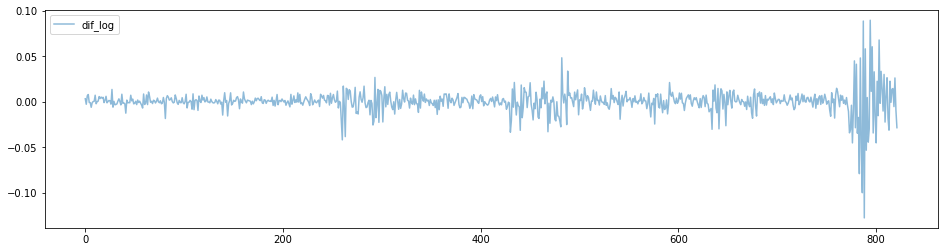

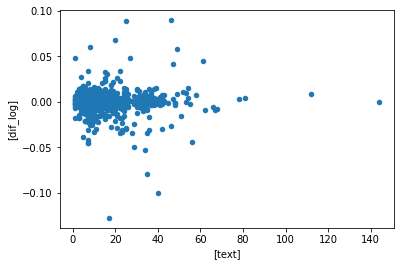

In [25]:
#ツイートのベクトルを1日毎に平均にする（1日10ツイートだった場合ベクトルと足し合わせ10で割る）
# groupby #https://qiita.com/propella/items/a9a32b878c77222630ae
df = df_tweets_word2vec.groupby(["date"]).mean()


# targetのcolである変化率（"price"の差分対数行列）をdateをKeyに内部結合する
df_sp = pd.read_csv("/content/sp500-10-year-daily-chart.csv")

# 時系列データの差分を求める

# " value"の行を対数化
# https://www.sejuku.net/blog/70027
df_sp["log"] = np.log(df_sp[" value"])

# "log"の1日前との差を取って、差分対数の列を作成
# https://note.nkmk.me/python-pandas-diff-pct-change/
df_sp["dif_log"] = df_sp["log"].diff()

#内部結合
df2=pd.merge(df_sp, df, how="inner" ,on="date")
df2 = df2.drop(" value", axis=1)

# groupbyを使って1日のツイート数も特徴量に加える
# https://deepage.net/features/pandas-count.html
df3 = df_tweets_word2vec[["date","text"]]
df3 = df3.groupby(["date"]).count()

#内部結合
df4 = pd.merge( df3, df2, how="inner" ,on="date")

#曜日を取得
df4['day_of_week'] = pd.to_datetime(df4['date']).dt.day_name()

#日付データの形を変える
df4["date"] = pd.to_datetime(df4['date']).astype('int64')

#変化率のグラフ
df4.plot( y=["dif_log"], figsize=(16,4), alpha=0.5)

#ツイート数と変化率の関係
df4.plot.scatter(x=["text"], y=["dif_log"])

In [0]:
dummy_df = pd.get_dummies(df4[['day_of_week']], drop_first = False) 
df4 = pd.merge(df4, dummy_df, left_index=True, right_index=True)

In [27]:
df4.head()

,date,text,log,dif_log,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,day_of_week,day_of_week_Friday,day_of_week_Monday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,1484870400000000000,13,7.728112,0.003361,2271.31,0.031134,0.001249,0.010945,-0.044521,0.020407,0.054613,0.064077,0.123329,0.081225,-0.005168,-0.024195,0.115243,-0.014268,-0.061127,-0.099218,-0.055028,-0.038964,0.117803,0.084434,-0.024622,-0.061650,-0.023350,0.060949,-0.002806,0.126923,0.006518,0.016442,-0.092195,-0.055066,-0.120646,0.065779,-0.054222,-0.114080,-0.014821,0.026681,...,-0.086199,0.017327,-0.171792,-0.040116,-0.002045,-0.012771,-0.013664,-0.081285,0.154167,0.048707,0.084071,-0.004616,0.003247,-0.058901,0.031159,-0.093227,0.034105,0.125969,-0.001379,-0.005514,0.061999,0.052310,0.052965,-0.060126,0.002679,-0.026152,0.024944,-0.091290,-0.000102,-0.002655,0.152801,-0.099765,0.169264,0.000873,Friday,1,0,0,0,0
1,1485129600000000000,1,7.725418,-0.002694,2265.20,0.021507,-0.027905,-0.012251,-0.027441,0.053567,0.042050,0.074125,0.125117,0.076789,0.020549,-0.074027,0.129520,-0.075081,-0.062732,-0.080029,-0.025372,-0.017680,0.119386,0.170684,-0.012520,-0.080359,-0.026793,0.038081,-0.062197,0.117176,0.031763,0.045176,-0.137557,-0.067182,-0.085294,0.051930,-0.003805,-0.119176,-0.015235,0.030030,...,-0.088379,0.012237,-0.149725,-0.017698,0.006766,-0.002031,-0.018458,-0.081073,0.122154,0.006066,0.044414,-0.045758,-0.051107,-0.018188,0.016895,-0.062740,0.027819,0.127898,-0.011834,-0.030654,0.059241,0.064801,0.054803,-0.051413,-0.030087,-0.012975,0.016628,-0.111063,0.013943,0.032937,0.136431,-0.117138,0.117573,0.012826,Monday,0,1,0,0,0
2,1485216000000000000,4,7.731961,0.006543,2280.07,0.023263,-0.005317,-0.002226,-0.037325,0.030781,0.001117,0.054638,0.089228,0.076715,0.042343,-0.056198,0.103957,-0.021022,-0.046457,-0.040830,-0.019986,-0.023487,0.080950,0.113633,-0.013260,-0.044437,-0.002838,0.019050,-0.012407,0.065453,-0.000415,0.041168,-0.141949,-0.026494,-0.077243,0.064822,-0.031948,-0.086946,-0.023498,0.041629,...,-0.109771,0.003984,-0.122843,-0.045807,-0.010886,0.029315,-0.027187,-0.050737,0.107516,0.013852,0.054713,-0.021522,-0.020260,-0.011690,0.015425,-0.055023,0.003875,0.077413,0.007611,-0.000204,0.029217,0.045351,0.046208,-0.065232,-0.039977,-0.009713,0.037962,-0.094784,-0.033220,0.027535,0.109487,-0.093159,0.112307,0.040744,Tuesday,0,0,0,1,0
3,1485302400000000000,8,7.739955,0.007994,2298.37,0.036482,-0.005789,0.038364,-0.057268,0.036607,0.044079,0.082106,0.100600,0.046847,0.006294,-0.059985,0.122200,-0.042645,-0.051370,-0.093587,-0.042920,-0.040149,0.142667,0.090988,-0.046377,-0.078943,-0.012990,0.032323,0.000942,0.127136,0.028012,0.017610,-0.118617,-0.079444,-0.059109,-0.021439,-0.021918,-0.049777,-0.036763,0.034194,...,-0.067844,0.028081,-0.106782,0.021205,0.025735,0.025816,-0.010768,-0.078895,0.094858,0.018418,0.046352,-0.022785,-0.028541,-0.008943,0.033064,-0.053525,0.014901,0.102938,-0.024681,-0.015653,0.055012,0.022550,-0.007271,-0.056918,-0.041438,0.025013,0.034028,-0.078617,0.025987,0.024317,0.157233,-0.055233,0.132069,-0.011572,Wednesday,0,0,0,0,1
4,1485388800000000000,11,7.739220,-0.000736,2296.68,0.026489,-0.016078,0.022654,-0.055716,0.041689,0.021967,0.065600,0.117050,0.079832,0.017480,-0.056236,0.118578,-0.024595,-0.057932,-0.086467,-0.046755,-0.020007,0.098652,0.114778,-0.020991,-0.050441,-0.032855,0.042585,-0.007287,0.106681,0.015576,0.032844,-0.115995,-0.066810,-0.064362,0.009981,-0.016327,-0.071757,-0.024744,0.023638,...,-0.079803,0.004536,-0.096239,0.005165,0.025896,0.015748,-0.020131,-0.087466,0.123331,0.031274,0.083174,-0.006371,-0.006622,-0.014606,0.014911,-0.070302,0.032434,0.102919,-0.006315,-0.015258,0.054451,0.037230,0.004431,-0.044865,-0.018480,0.013936,0.034902,-0.075157,0.005226,0.026391,0.126812,-0.060259,0.115772,-0.020

In [0]:
#特徴量とターゲットを決める
from sklearn.model_selection import train_test_split

target_col = 'dif_log'
exclude_cols = ['log', 'price', 'dif_log', "date","text","day_of_week"]
feature_cols = []
for col in df4.columns:
    if col not in exclude_cols:
        feature_cols.append(col)
        
X = np.array(df4[feature_cols])
y = np.array(df4[target_col])

In [29]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1234)

print('X_train_val Features Shape: ', X_train_val.shape)
print('y_train_val Target Shape: ', y_train_val.shape)
print('X_test Features Shape: ', X_test.shape)
print('y_test Target Shape: ', y_test.shape)

X_train_val Features Shape:  (739, 305)
y_train_val Target Shape:  (739,)
X_test Features Shape:  (83, 305)
y_test Target Shape:  (83,)


In [30]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1, random_state=1234)

# 参考：分割後のデータ数を確認
print('X_train Features Shape: ', X_train.shape)
print('y_train Target Shape: ', y_train.shape)
print('X_val Features Shape: ', X_val.shape)
print('y_val Target Shape: ', y_val.shape)

X_train Features Shape:  (665, 305)
y_train Target Shape:  (665,)
X_val Features Shape:  (74, 305)
y_val Target Shape:  (74,)


In [0]:
#分析用のライブラリ

from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression  # 線形回帰モデルのライブラリ
from sklearn.metrics import mean_squared_error  # MSEのライブラリ
from sklearn.ensemble import RandomForestRegressor

In [32]:
#分析1 線形回帰

from sklearn.linear_model import LinearRegression  # 線形回帰モデルのライブラリ
from sklearn.metrics import mean_squared_error  # MSEのライブラリ
from sklearn.externals import joblib
import pickle

lm = LinearRegression()
lm.fit(X_train, y_train)

# モデルを保存する
filename = 'lm_model.sav'
pickle.dump(lm, open(filename, 'wb'))

y_pred = lm.predict(X_val)
lm_mse = mean_squared_error(y_val, y_pred)
print('LinerRegression RMSE: ', round(np.sqrt(lm_mse), 3))

LinerRegression RMSE:  0.019


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [33]:
#保存したモデルを読み取る
loaded_model = pickle.load(open(filename, 'rb'))

y_pred = loaded_model.predict(X_val)
lm_mse = mean_squared_error(y_val, y_pred)
print('LinerRegression RMSE: ', round(np.sqrt(lm_mse), 3))

LinerRegression RMSE:  0.019


In [34]:
#分析2 決定木

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=1234)
dt.fit(X_train, y_train)

# モデルを保存する
filename = 'dt_model.sav'
pickle.dump(dt, open(filename, 'wb'))

y_pred = dt.predict(X_val)
dt_mse = mean_squared_error(y_val, y_pred)
print('DecisionTreeRegressor RMSE: ', round(np.sqrt(dt_mse), 3))

DecisionTreeRegressor RMSE:  0.024


In [35]:
#分析3 ランダムフォレスト

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=1234)
rf.fit(X_train, y_train)

# モデルを保存する
filename = 'rf_model.sav'
pickle.dump(rf, open(filename, 'wb'))

y_pred = rf.predict(X_val)
rf_mse = mean_squared_error(y_val, y_pred)
print('RandomForestRegressor RMSE: ', round(np.sqrt(rf_mse), 3))

RandomForestRegressor RMSE:  0.013


In [36]:
#分析3.5 Lasso回帰：説明変数が多い場合に精度が上がるモデル

from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.1)
ls.fit(X_train, y_train)

# モデルを保存する
filename = 'ls_model.sav'
pickle.dump(ls, open(filename, 'wb'))

y_pred = ls.predict(X_val)
ls_mse = mean_squared_error(y_val, y_pred)
print('LassoRegressor RMSE: ', round(np.sqrt(ls_mse), 3))

LassoRegressor RMSE:  0.013


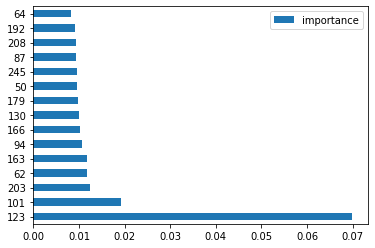

In [37]:
#分析3 ランダムフォレストの特徴量

rf_importances = pd.DataFrame(rf.feature_importances_, columns=['importance'], index=feature_cols)
rf_importances.sort_values('importance', ascending=False).iloc[0:15].plot(kind='barh')

In [38]:
#3つの分析の結果の比較

print('線形回帰モデルのRMSE:    ', round(np.sqrt(lm_mse), 3))
print('回帰木のRMSE:                  ', round(np.sqrt(dt_mse), 3))
print('ランダムフォレストのRMSE: ', round(np.sqrt(rf_mse), 3))
print('Lasso回帰のRMSE: ', round(np.sqrt(ls_mse), 3))

線形回帰モデルのRMSE:     0.019
回帰木のRMSE:                   0.024
ランダムフォレストのRMSE:  0.013
Lasso回帰のRMSE:  0.013


In [39]:
#分析4 ランダムフォレストのチューニング

# クロスバリデーションとグリッドサーチ のライブラリ
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=1234)

params = {'n_estimators': [10, 25, 50, 100], 'max_depth': [10, 20, 30, 50]}
gscv = GridSearchCV(rf, param_grid=params, verbose=1, cv=3,
                    scoring='neg_mean_squared_error', n_jobs=-1)
gscv.fit(X_train, y_train)

gscv.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.2min finished


{'max_depth': 20, 'n_estimators': 100}

In [40]:
#分析4 ランダムフォレストのチューニング
best_estimators = gscv.best_params_["n_estimators"]
best_depth = gscv.best_params_["max_depth"]

rf_best = RandomForestRegressor(n_estimators=best_estimators, max_depth=best_depth, random_state=1234)
rf_best.fit(X_train, y_train)

# モデルを保存する
filename = 'rf_best_model.sav'
pickle.dump(rf_best, open(filename, 'wb'))

y_pred = rf_best.predict(X_val)
rf_best_mse = mean_squared_error(y_val, y_pred)
print('RandomForest RMSE: ', round(np.sqrt(rf_best_mse), 3))

RandomForest RMSE:  0.013


In [41]:
#分析5 チューニングしたモデルにテストデータを代入

y_pred_on_test = rf_best.predict(X_test)
rf_best_test_mse = mean_squared_error(y_test, y_pred_on_test)
print('RandomForest RMSE: ', round(np.sqrt(rf_best_test_mse), 3))

RandomForest RMSE:  0.012


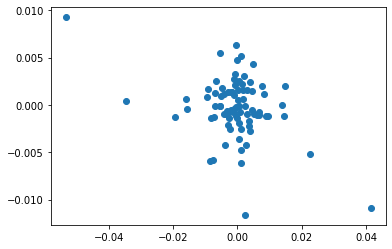

Mean:  1.6882
Std:  4.27389


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


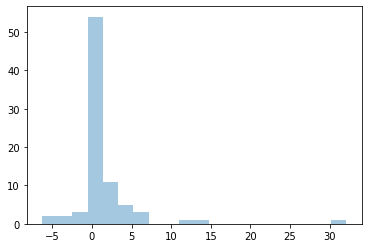

In [42]:
#分析5 テストデータを代入
#誤差を可視化

plt.scatter(y_test, y_pred_on_test)
plt.show()

import seaborn as sns

error_rate = (y_test - y_pred_on_test) / y_test
print('Mean: ', round(np.mean(error_rate), 5))
print('Std: ', round(np.std(error_rate), 5))
sns.distplot(error_rate, kde=False, rug=False, bins=20)

In [43]:
#分析6 クラスタリング
#https://hironsan.hatenablog.com/entry/clustering-word-vectors

from collections import defaultdict
from gensim.models.keyedvectors import KeyedVectors
from sklearn.cluster import KMeans

model = KeyedVectors.load('skipgram_w2v.model')
max_vocab = 30000
vocab = list(model.wv.vocab.keys())[:max_vocab]
vectors = [model.wv[word] for word in vocab]

n_clusters = 30
kmeans_model = KMeans(n_clusters=n_clusters, verbose=1, random_state=1234, n_jobs=-1)
kmeans_model.fit(vectors)

cluster_labels = kmeans_model.labels_
cluster_to_words = defaultdict(list)
for cluster_id, word in zip(cluster_labels, vocab):
    cluster_to_words[cluster_id].append(word)

for words in cluster_to_words.values():
    print(words[:10])

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


['trump', 'show', '”', 'deep', '2016', 'covering', 'interview', 'quite', 'marthamaccallum', 'joe']
['gets', 'back', 'make', 'given', 'amp', 'late', 'done', 'ventilators', 'getting', 'always']
['latest', 'fire', 'president', 'pandemic', 'hughhewitt', 'direction', 'strategy', 'office', 'may', 'teachers']
['poll', 'approval', 'republican', 'party', 'rating', '52', 'record', 'high', 'polls', 'points']
['6', 'best', '7', 'point', 'trillion', 'since', 'history', 'gopchairwoman', 'cut', 'million']
['tied', 'using', 'gave', 'authority', 'cop', 'seems', 'bucksexton', 'responsible', 'flynn', 'tried']
['governor', 'michigan', 'night', 'vote', 'wisconsin', 'jersey', 'iowa', 'early', 'win', 'louisiana']
['give', 'want', 'cryin', 'chuck', 'schumer', 'senators', 'enough', 'voted', 'congress', 'democrats']
['little', 'put', 'deal', 'states', 'others', 'spent', '8', 'chinese', 'rest', 'ultimately']
['good', 'see', 'one', 'days', 'tremendous', 'new', 'team', 'impact', 'glad', 'last']
['people', 'lives',

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


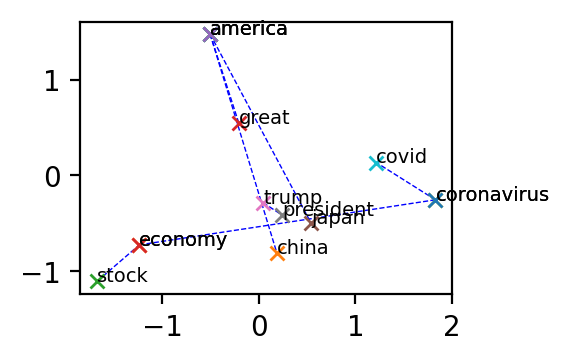

In [44]:
#分析7 似ている単語をプロット
# https://yoshipc.net/python-word2vec/
 
from gensim.models import word2vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
 
model = word2vec.Word2Vec.load("/content/skipgram_w2v.model")
 
#調べる情報を配列に収納
trump_word = []
trump_word.append(["america","china"])
trump_word.append(["america","great"])
trump_word.append(["america","japan"])
trump_word.append(["trump","president"])
trump_word.append(["coronavirus","covid"])
trump_word.append(["coronavirus","economy"])
trump_word.append(["stock","economy"])

length = len(trump_word)
data = []
 
j = 0
while j < length:
    #print(trump_word[j][1])
    data.append(model[trump_word[j][0]])
    data.append(model[trump_word[j][1]])
    j += 1
 
pca = PCA(n_components=2)
pca.fit(data)
data_pca= pca.transform(data)
 
length_data = len(data_pca)
 
i = 0
j = 0

plt.figure(figsize=(2.4, 1.8), dpi=200)

while i < length_data:
    #点プロット
    plt.plot(data_pca[i][0], data_pca[i][1], ms=5.0, zorder=2 ,marker="x")
    plt.plot(data_pca[i+1][0], data_pca[i+1][1],ms=5.0, zorder=2 ,marker="x")
 
    #線プロット
    plt.plot((data_pca[i][0], data_pca[i+1][0]),(data_pca[i][1],data_pca[i+1][1]),c="b",linewidth=0.5,zorder=1,linestyle="--")
 
    #文字プロット
    plt.annotate(trump_word[j][0],(data_pca[i][0], data_pca[i][1]),size=7)
    plt.annotate(trump_word[j][1],(data_pca[i+1][0], data_pca[i+1][1]),size=7)
 
    j += 1
    i += 2
 
plt.show()

In [0]:
#分析8 DeepLearning
#ライブラリをインポート

import numpy as np
import pandas as pd
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [0]:
class myMLP(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.ln1 = nn.Linear(in_features, 256)
        self.ln2 = nn.Linear(256, 128)
        self.ln3 = nn.Linear(128, 32)
        self.ln4 = nn.Linear(32, 64)
        self.ln5 = nn.Linear(64, 32)
        self.ln6 = nn.Linear(32, 4)
        self.ln7 = nn.Linear(4, out_features)

    def forward(self, x):
        x = self.ln1(x)
        x = F.relu(x)
        x = self.ln2(x)
        x = F.relu(x)
        x = self.ln3(x)
        x = F.relu(x)
        x = self.ln4(x)
        x = F.relu(x)
        x = self.ln5(x)
        x = F.relu(x)
        x = self.ln6(x)
        x = F.relu(x)
        x = self.ln7(x)
        return x

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([57])) that is different to the input size (torch.Size([57, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([165])) that is different to the input size (torch.Size([165, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input

test_loss:  tensor(0.0001, grad_fn=<DivBackward0>)


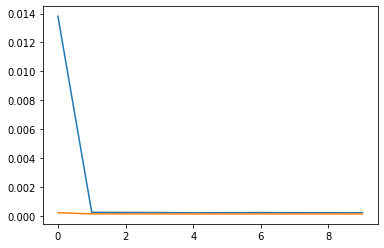

In [47]:
#分析8 DeepLearning
# NumPyのarryをtorch.tensor型に変換する。

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

#ネットワークを書く
net = myMLP(305,1)
net.parameters

#目的関数を指定（今回は回帰問題のためMSELoss()を使用する）
#https://pytorch.org/docs/stable/nn.html#loss-functions
loss_func = nn.MSELoss()
#Optimizerを定義する
#https://pytorch.org/docs/stable/optim.html
optimizer = optim.RMSprop(net.parameters())
  
train_loss_track = []
test_loss_track = []

for epoc in range(10):
    running_loss = 0
    
    # 学習モード
    net.train()
    for step, (xx, yy)  in enumerate(train_loader):
        
        # 最後に計算した各パラメーターの勾配を初期化する
        optimizer.zero_grad()
        
        # フォワード計算を行う
        y_pred = net(xx).float()
        
        # 誤差関数を使ってギャップの計測
        loss = loss_func(y_pred, yy)
      
        # 誤差逆伝播法を使って自動微分
        loss.backward()
        
        # パラメーターを更新
        optimizer.step()
        
        # 学習データを使って誤差を計算
        running_loss += loss.item()
        
    # エポックが終了したら平均誤差を計算
    train_loss_track.append(running_loss/step)
    
    
    #評価（evaluation）モード
    net.eval()
    
    # 予測値を計算
    y_pred = net(X_test_tensor)
    
    # 誤差関数を計算
    test_loss = loss_func(y_pred, y_test_tensor)
    
    # 誤差をトラッキング
    test_loss_track.append(test_loss)



plt.plot(train_loss_track)
plt.plot(test_loss_track)
print("test_loss: ",sum(test_loss_track)/len(test_loss_track))

RandomForestRegressor RMSE:  0.016
['confident']
['coronavirus']
['declare']
['nationwide']
['duly']
['spreading']
['covid19']
['practice']
['cutter']
['outbreak']
['545']
['prevail']
['billcassidy']
['restaurants']
['jack']


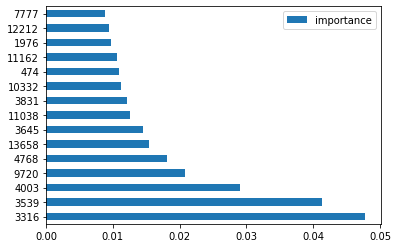

In [48]:
#分析9　TFIDFを用いたランダムフォレスト

#形態素解析のデータセットを作る
#https://qiita.com/tomone_hata/items/67e7f9415dbf5c8ff8ba

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#形態素解析のデータセットを作る
#文章を全部１つのリストに入れる→TFIDFを作る→それぞれの日付に出てくる単語をKeyにTFIDFの値を取ってくる

data_keitaiso = pd.read_csv("s&p_tweets.csv")
tweet_keitaiso=[]

for tweet in data_keitaiso["text"]:
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  tweet = re.sub(r'(http|https):\/\/.*[\r\n]*', '', tweet)
  tweet = re.sub(r'#', '', tweet)
  tweet = tweet.translate(str.maketrans('', '', string.punctuation)) 
  tweet_keitaiso.append(tweet)

corpus = tweet_keitaiso         
cv = CountVectorizer(token_pattern=r"\b\w+\b")
wc = cv.fit_transform(corpus)
ttf = TfidfTransformer()
tfidf = ttf.fit_transform(wc)

#蜜行列に変更する
X_tfidf = tfidf.toarray()

data3 = pd.DataFrame(X_tfidf)
df_tweets_tfidf =  pd.concat([data_keitaiso, data3], axis=1)

df = df_tweets_tfidf.groupby(["date"]).mean()
df_sp = pd.read_csv("/content/sp500-10-year-daily-chart.csv")
df_sp["log"] = np.log(df_sp[" value"])
df_sp["dif_log"] = df_sp["log"].diff()
df2=pd.merge(df_sp, df, how="inner" ,on="date")
df2 = df2.drop(" value", axis=1)
df3 = df_tweets_tfidf[["date","text"]]
df3 = df3.groupby(["date"]).count()
df_tfidf = pd.merge( df3, df2, how="inner" ,on="date")
df_tfidf["date"] = pd.to_datetime(df4['date']).astype('int64')

from sklearn.model_selection import train_test_split

target_col = 'dif_log'
exclude_cols = ['log', 'price', 'dif_log', "date","text"]
feature_cols = []
for col in df_tfidf.columns:
    if col not in exclude_cols:
        feature_cols.append(col)
        
X2 = np.array(df_tfidf[feature_cols])
y2 = np.array(df_tfidf[target_col])

X２_train_val, X２_test, y２_train_val, y２_test = train_test_split(
    X２, y２, test_size=0.1, random_state=1234)

X２_train, X２_val, y２_train, y２_val = train_test_split(
    X２_train_val, y２_train_val, test_size=0.1, random_state=1234)

#分析
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=1234)
rf.fit(X２_train, y２_train)

filename = 'rf_TFIDF_model.sav'
pickle.dump(rf, open(filename, 'wb'))

y２_pred = rf.predict(X２_val)
rf_mse_2 = mean_squared_error(y２_val, y２_pred)
print('RandomForestRegressor RMSE: ', round(np.sqrt(rf_mse_2), 3))

#プロット
rf_importances = pd.DataFrame(rf.feature_importances_, columns=['importance'], index=feature_cols)
rf_importances.sort_values('importance', ascending=False).iloc[0:15].plot(kind='barh')

#列名をゲット
#https://note.nkmk.me/python-dict-get-key-from-value/

voca = cv.vocabulary_

def get_keys_from_value(d, val):
    return [k for k, v in d.items() if v == val]

for i in rf_importances.sort_values('importance', ascending=False).iloc[0:15].index:
  keys = get_keys_from_value(voca, i)
  print(keys)
# ['key1', 'key2']

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([57])) that is different to the input size (torch.Size([57, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([165])) that is different to the input size (torch.Size([165, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input

test_loss:  tensor(0.0005, grad_fn=<DivBackward0>)


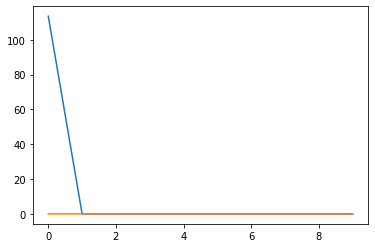

In [49]:
#分析10　形態素解析でDeepLearning

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X２, y2, test_size=0.2, random_state=1234)

X2_train_tensor = torch.tensor(X2_train, dtype=torch.float32)
y2_train_tensor = torch.tensor(y2_train, dtype=torch.float32)
X2_test_tensor = torch.tensor(X2_test, dtype=torch.float32)
y2_test_tensor = torch.tensor(y2_test, dtype=torch.float32)

train2_dataset = TensorDataset(X2_train_tensor, y2_train_tensor)
train2_loader = DataLoader(train2_dataset, batch_size=100, shuffle=True)

#ネットワークを書く
net = myMLP(16493,1)
net.parameters

#目的関数を指定（今回は回帰問題のためMSELoss()を使用する）
#https://pytorch.org/docs/stable/nn.html#loss-functions
loss_func = nn.MSELoss()
#Optimizerを定義する
#https://pytorch.org/docs/stable/optim.html
optimizer = optim.RMSprop(net.parameters())
  
train_loss_track = []
test_loss_track = []

for epoc in range(10):
    running_loss = 0
    
    # 学習モード
    net.train()
    for step, (xx, yy)  in enumerate(train2_loader):
        
        # 最後に計算した各パラメーターの勾配を初期化する
        optimizer.zero_grad()
        
        # フォワード計算を行う
        y_pred = net(xx).float()
        
        # 誤差関数を使ってギャップの計測
        loss = loss_func(y_pred, yy)
      
        # 誤差逆伝播法を使って自動微分
        loss.backward()
        
        # パラメーターを更新
        optimizer.step()
        
        # 学習データを使って誤差を計算
        running_loss += loss.item()
        
    # エポックが終了したら平均誤差を計算
    train_loss_track.append(running_loss/step)
    
    
    #評価（evaluation）モード
    net.eval()
    
    # 予測値を計算
    y_pred = net(X2_test_tensor)
    
    # 誤差関数を計算
    test_loss = loss_func(y_pred, y2_test_tensor)
    
    # 誤差をトラッキング
    test_loss_track.append(test_loss)



plt.plot(train_loss_track)
plt.plot(test_loss_track)
print("test_loss: ",sum(test_loss_track)/len(test_loss_track))

In [50]:
#分析11 アンサンブル学習
# https://blog.ikedaosushi.com/entry/2018/10/21/204842?t=0

random_state = 1234

X_train_valid, X_meta_valid, y_train_valid, y_meta_valid = train_test_split(X, y, test_size=0.1, random_state=random_state)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.1, random_state=random_state)

import lightgbm as lgb
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

# train base model
base_model_1 = LinearRegression()
base_model_2 = LGBMRegressor()
base_model_3 = KNeighborsRegressor()

base_model_1.fit(X_train, y_train)
base_model_2.fit(X_train, y_train)
base_model_3.fit(X_train, y_train)

# base predicts
base_pred_1 = base_model_1.predict(X_valid)
base_pred_2 = base_model_2.predict(X_valid)
base_pred_3 = base_model_3.predict(X_valid)

# test predicts for final result 
valid_pred_1 = base_model_1.predict(X_meta_valid)
valid_pred_2 = base_model_2.predict(X_meta_valid)
valid_pred_3 = base_model_3.predict(X_meta_valid)

print ("mean squared error of model 1: {:.4f}".format(mean_squared_error(y_meta_valid, valid_pred_1)) )
print ("mean squared error of model 2: {:.4f}".format(mean_squared_error(y_meta_valid, valid_pred_2)) )
print ("mean squared error of model 3: {:.4f}".format(mean_squared_error(y_meta_valid, valid_pred_3)) )

# stack base predicts for training meta model
stacked_predictions = np.column_stack((base_pred_1, base_pred_2, base_pred_3))

# stack test predicts for final result 
stacked_valid_predictions = np.column_stack((valid_pred_1, valid_pred_2, valid_pred_3))

# train meta model 
meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_valid)

filename = 'meta_model.sav'
pickle.dump(meta_model, open(filename, 'wb'))

# final result 
meta_valid_pred = meta_model.predict(stacked_valid_predictions)
print ("mean squared error of meta model: {:.4f}".format(mean_squared_error(y_meta_valid, meta_valid_pred)) )


mean squared error of model 1: 0.0004
mean squared error of model 2: 0.0002
mean squared error of model 3: 0.0001
mean squared error of meta model: 0.0001


In [54]:
f = open('/content/trump_test.txt', 'r')
text = f.read()
mylist = literal_eval(text)

df_text=[]
df_created_at=[]
df_id_str=[]

for i in range(len(mylist)):
    text = mylist[i]["text"]
    created_at = mylist[i]["created_at"]
    id_str = mylist[i]["id_str"]
    df_text.append(text)
    df_created_at.append(created_at)
    df_id_str.append(id_str)

tweet_list=[df_created_at,df_id_str,df_text]

columns1=["created_at"]
tweet_data = pd.DataFrame( data = df_created_at, columns = columns1)
tweet_data["id"]=df_id_str
tweet_data["text"] = df_text

tweet_data["time_created_at"] = pd.to_datetime(tweet_data['created_at'])
tweet_data["date_created_at"] = tweet_data["time_created_at"].dt.date
tweet_data["key"]=pd.to_datetime(tweet_data["date_created_at"])

sp_data = pd.read_csv('/content/sp500-10-year-daily-chart.csv')
sp_data["date_64"] = pd.to_datetime(sp_data["date"])
sp_data["key"] =sp_data["date_64"] 

tweet_data=pd.merge(tweet_data, sp_data)
tweet_data.columns
data = tweet_data[["key"," value","text"]]

#行の名前を変更する　20200505
data = data.rename(columns={"key": "date"," value":"price"})
data.head()

import datetime as dt
data2 = data[(data['date'] >= dt.datetime(2019,5,1)) & (data['date'] <= dt.datetime(2022,5,31))]
print( "2020/05/02 - 2020/05/31のツイート数は", len(data2))
data2.to_csv("s&p_tweets_test.csv", index=False, mode='a', header=True)

data = pd.read_csv("s&p_tweets_test.csv")
print( len(data),"tweets")

import re
import string

stemmer = nltk.stem.PorterStemmer()
punctuations = string.punctuation
all_tweets_clean = []

#Tweet毎にリスト形式で保存するための加工
result=[]

for tweet in data["text"]:
    # RTから始まる部分を取り除く。
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # リンクを取り除く。
    tweet = re.sub(r'(http|https):\/\/.*[\r\n]*', '', tweet)
    # ハッシュタグを取り除く。
    tweet = re.sub(r'#', '', tweet)
    # 句読点の削除
    tweet = tweet.translate(str.maketrans('', '', string.punctuation)) 
    # 単語に分解する。
    tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    result.append(tweet_tokens)
    
stopwords = nltk.corpus.stopwords.words('english')
stop_words = ["→", "←", "?", "」", "「","(",")","!",".",",","&","…","%",":",";","“"]
stopwords += stop_words

#print(stopwords)

result_2=[]
result_3=[]
for i in range(len(result)):
    for word in result[i]:
        if word not in stopwords:
            result_2.append(word)
    result_3.append(result_2)
    result_2=[]

from gensim.models import word2vec
skipgram_model = word2vec.Word2Vec.load("/content/skipgram_w2v.model")

num_features = 300


def avg_document_vector(data, num_features):
    document_vec = np.zeros((len(data), num_features))
    for i, doc_word_list in enumerate(data):
        feature_vec = np.zeros((num_features,), dtype="float32")
        for word in doc_word_list:
            try:
                feature_vec = np.add(
                    feature_vec, skipgram_model.wv.__getitem__(word))
            except:
                pass

        feature_vec = np.divide(feature_vec, len(doc_word_list))
        document_vec[i] = feature_vec
    return document_vec

sentences = result_3
sentences[0]

X = avg_document_vector(data=sentences, num_features=300)
X.shape


data2 = pd.DataFrame(X)
df_tweets_word2vec =  pd.concat([data, data2], axis=1)

df_tweets_word2vec.to_csv("price_tweets_vector.csv", index=False)

#ツイートのベクトルを1日毎に平均にする（1日10ツイートだった場合ベクトルと足し合わせ10で割る）
# groupby #https://qiita.com/propella/items/a9a32b878c77222630ae
df = df_tweets_word2vec.groupby(["date"]).mean()


# targetのcolである変化率（"price"の差分対数行列）をdateをKeyに内部結合する
df_sp = pd.read_csv("/content/sp500-10-year-daily-chart.csv")

# 時系列データの差分を求める

# " value"の行を対数化
# https://www.sejuku.net/blog/70027
df_sp["log"] = np.log(df_sp[" value"])

# "log"の1日前との差を取って、差分対数の列を作成
# https://note.nkmk.me/python-pandas-diff-pct-change/
df_sp["dif_log"] = df_sp["log"].diff()

#内部結合
df2=pd.merge(df_sp, df, how="inner" ,on="date")
df2 = df2.drop(" value", axis=1)

# groupbyを使って1日のツイート数も特徴量に加える
# https://deepage.net/features/pandas-count.html
df3 = df_tweets_word2vec[["date","text"]]
df3 = df3.groupby(["date"]).count()

#内部結合
df4 = pd.merge( df3, df2, how="inner" ,on="date")

#曜日を取得
df4['day_of_week'] = pd.to_datetime(df4['date']).dt.day_name()

date_for_result = df4["date"]

#日付データの形を変える
df4["date"] = pd.to_datetime(df4['date']).astype('int64')


dummy_df = pd.get_dummies(df4[['day_of_week']], drop_first = False) 
df4 = pd.merge(df4, dummy_df, left_index=True, right_index=True)

2020/05/02 - 2020/05/31のツイート数は 620
620 tweets


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in true_divide


Linear Regression　: RMSE 0.026
Decision Tree　: RMSE 0.022
Random Forest　: RMSE 0.014
Random Forest Best　: RMSE 0.014
Lasso　: RMSE 0.014


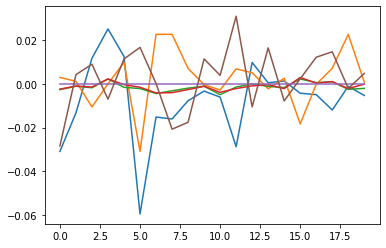

In [55]:
#特徴量とターゲットを決める
from sklearn.model_selection import train_test_split

target_col = 'dif_log'
exclude_cols = ['log', 'price', 'dif_log', "date","text","day_of_week"]
feature_cols = []
for col in df4.columns:
    if col not in exclude_cols:
        feature_cols.append(col)
        
X = np.array(df4[feature_cols])
y = np.array(df4[target_col])

from sklearn.externals import joblib
import pickle

files = [("Linear Regression",'/content/lm_model.sav'),("Decision Tree",'/content/dt_model.sav'),("Random Forest",'/content/rf_model.sav'),("Random Forest Best",'/content/rf_best_model.sav'),("Lasso","/content/ls_model.sav")]
df_result = pd.DataFrame(df4["dif_log"])

for i,(name,filename) in enumerate(files):
  loaded_model = pickle.load(open(filename, 'rb'))
  y_pred = loaded_model.predict(X)
  mse = mean_squared_error(y, y_pred)
  df_result[name] = y_pred
  print(name+"　: RMSE", round(np.sqrt(mse), 3))
  plt.plot(df_result[name])
plt.plot(df_result["dif_log"])

plt.show()

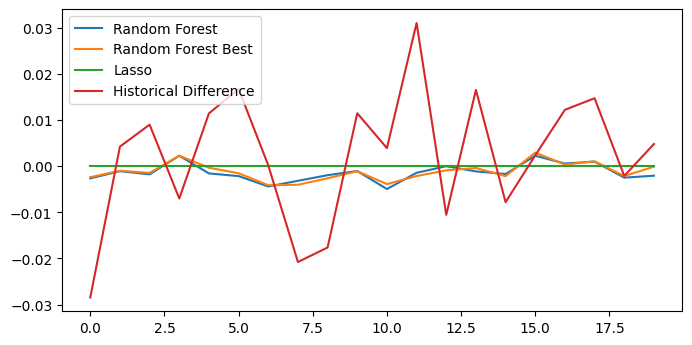

In [56]:
fig = plt.figure(figsize=(8,4),dpi=100)
rf = plt.plot(df_result["Random Forest"])
rf_b =plt.plot(df_result["Random Forest Best"])
ls =plt.plot(df_result["Lasso"])
sp = plt.plot(df_result["dif_log"])
plt.legend((rf[0], rf_b[0],ls[0],sp[0]), ("Random Forest", "Random Forest Best", "Lasso","Historical Difference"), loc=2)

In [0]:
#上手くいってない
#分析6 Doc2Vecでツイートをクラスタリングする①
#https://qiita.com/g-k/items/5ea94c13281f675302ca

#from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#from gensim import models

#documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sentences)]
#model = Doc2Vec(documents, vector_size=300, window=5, min_count=1, workers=4)
#model.save("doc2_w2v.model")

In [0]:
#上手くいってない
#分析6 Doc2Vecでツイートをクラスタリングする②
#https://qiita.com/naotaka1128/items/e617f63907fed035408a

#model = models.Doc2Vec.load('/content/doc2_w2v.model')

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def draw_word_scatter(word, topn=30):
    """ 入力されたwordに似ている単語の分布図を描くためのメソッド """

    # 似ている単語を求めるためにはGensim word2vecの以下の機能を利用
    # model.most_similar(word, topn=topn)
    words = [x[0] for x in sorted(model.most_similar(word, topn=topn))]
    words.append(word)

    # 各単語のベクトル表現を求めます。Gensimのmost_similarをベースとして
    # 単語のベクトルを返すメソッド(model.calc_vec)を定義しています
    # 長くなるので実装は本稿の末尾に記載しました。
    vecs = [model.calc_vec(word) for word in words]

    # 分布図
    draw_scatter_plot(vecs, words)

def draw_scatter_plot(vecs, tags, clusters):
    """ 入力されたベクトルに基づき散布図(ラベル付き)を描くためのメソッド """

    # Scikit-learnのPCAによる次元削減とその可視化
    pca = PCA(n_components=2)
    coords = pca.fit_transform(vecs)

    # matplotlibによる可視化
    fig, ax = plt.subplots()
    x = [v[0] for v in coords]
    y = [v[1] for v in coords]

    # 各点のクラスターが設定されていればクラスタを考慮
    # エラーハンドリングは適当
    if clusters:
        ax.scatter(x, y, c=clusters)
    else:
        ax.scatter(x, y)

    for i, txt in enumerate(tags):
        ax.annotate(txt, (coords[i][0], coords[i][1]))
    plt.show()
    
#draw_word_scatter('coronavirus', topn=40)

In [0]:
#　まだできていない
# モデルの精度を確認する
# https://note.com/uki_profit/n/nab22a04262f9

In [0]:
#分析２　決定木　描画

#$ brew install graphviz

#from sklearn.tree import export_graphviz
#export_graphviz(regressor, out_file='tree.dot', feature_names=['nth', 'holiday'])

#$ dot -Tpng tree.dot -o tree.png